# Neural Network Type Classification | TMNIST

# 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as keras
import tensorflow as tf 

# Step 2: Read Data
Now, we will read in the data from the given URL and store it in a pandas DataFrame.

In [2]:
url = "https://raw.githubusercontent.com/shreya-maher/DSEM_Datasets/main/TMNIST_Data.csv"
df = pd.read_csv(url, header=0)
df

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29895,Raleway[wght],7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29896,Charm-Regular,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29897,BigShouldersStencilDisplay-Black,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29898,Gabriela-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Another way  you can download dataset using this link and read dataset giveing path 
     https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist?select=TMNIST_Data.csv

In [3]:
df1=pd.read_csv('TMNIST_Data.csv')

In [4]:
df1.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 3: Explore the data

In [5]:
df.shape # row and columns

(29900, 786)

In [6]:
df.columns # columns name 

Index(['names', 'labels', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=786)

In [7]:
# check unique values in dataset
df.nunique()

names     2990
labels      10
1            1
2            1
3            1
          ... 
780          1
781          1
782          1
783          1
784          1
Length: 786, dtype: int64

In [8]:
# check single perticular label name unique value 
df.labels.nunique()

10

# Step 4: Prepare the data for modeling
   We need to prepare the data before we can use it to train a neural network. Here, we will split the dataset into training and testing sets, and then scale the pixel values to be between 0 and 1.

In [9]:
# split dataset in x and y
x=df.drop(columns={'names', 'labels'},axis=1)
y=df['labels']

In [10]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
# Check the shape 
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((23920, 784), (5980, 784), (23920,), (5980,))

In [12]:
# Scale the pixel values
x_train=x_train/255.0
x_test=x_test/255.0

In [13]:
x_test.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
15756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print(x_train.shape, y_train.shape)

(23920, 784) (23920,)


In [15]:
type(x_train)

pandas.core.frame.DataFrame

In [16]:
x_train.iloc[1].value_counts()

0.000000    649
1.000000     15
0.003922      4
0.984314      3
0.321569      3
           ... 
0.145098      1
0.250980      1
0.474510      1
0.435294      1
0.301961      1
Name: 15610, Length: 91, dtype: int64

# Further visualising a sample image from our processed data below:

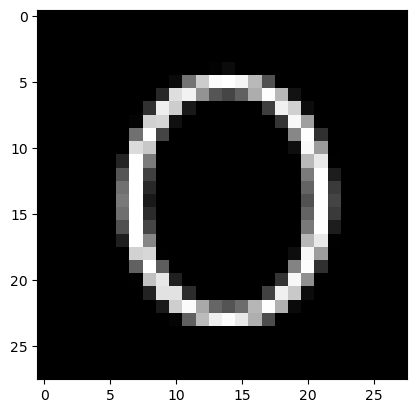

In [17]:
# Reshape a row of the data into a 28x28 image
sample_image = x_train.iloc[1].values.reshape(28, 28)
#plot the image
plt.imshow(sample_image,cmap='gray')
#plt.axis('off')
plt.show()


The above has reshaped the row into a 28x28 pixel image using the reshape() method and then displayed the handwritten 0 in image using imshow() and show() functions.

# Step 5: Build the neural network

In [18]:
#define model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128,input_shape=(784,),activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model

In [19]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
598/598 [==============================] - 5s 6ms/step - loss: 0.2550 - accuracy: 0.9385 - val_loss: 0.1349 - val_accuracy: 0.9628
Epoch 2/10
598/598 [==============================] - 3s 5ms/step - loss: 0.1154 - accuracy: 0.9690 - val_loss: 0.1117 - val_accuracy: 0.9712
Epoch 3/10
598/598 [==============================] - 3s 5ms/step - loss: 0.0855 - accuracy: 0.9763 - val_loss: 0.0955 - val_accuracy: 0.9749
Epoch 4/10
598/598 [==============================] - 3s 5ms/step - loss: 0.0699 - accuracy: 0.9809 - val_loss: 0.0913 - val_accuracy: 0.9764
Epoch 5/10
598/598 [==============================] - 3s 5ms/step - loss: 0.0579 - accuracy: 0.9845 - val_loss: 0.0901 - val_accuracy: 0.9766
Epoch 6/10
598/598 [==============================] - 3s 5ms/step - loss: 0.0484 - accuracy: 0.9865 - val_loss: 0.0795 - val_accuracy: 0.9791
Epoch 7/10
598/598 [==============================] - 3s 5ms/step - loss: 0.0399 - accuracy: 0.9894 - val_loss: 0.0807 - val_accuracy: 0.9785
Epoch 

# Step 7: Evaluate the model

In [20]:
# Evaluate the model on the test data
test_loss,test_acc=model.evaluate(x_test,y_test)

187/187 [==============================] - 1s 3ms/step - loss: 0.0881 - accuracy: 0.9806


In [21]:

print('Test accuracy:', test_acc)

Test accuracy: 0.9806020259857178


The final validation accuracy is ~98%.

# Visualize the results
We can visualize the training and validation accuracy and loss over the epochs to see how the model performed.

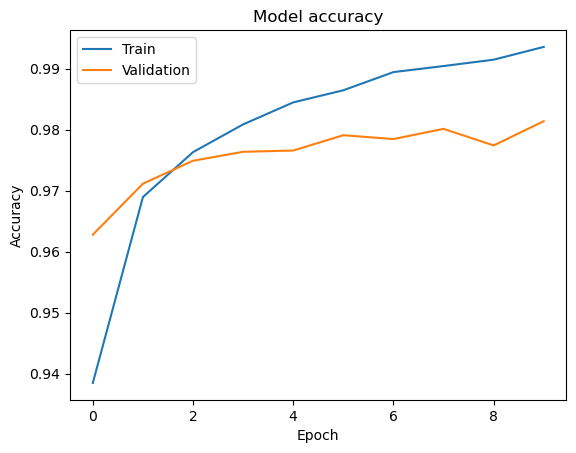

Text(0.5, 1.0, 'Model loss')

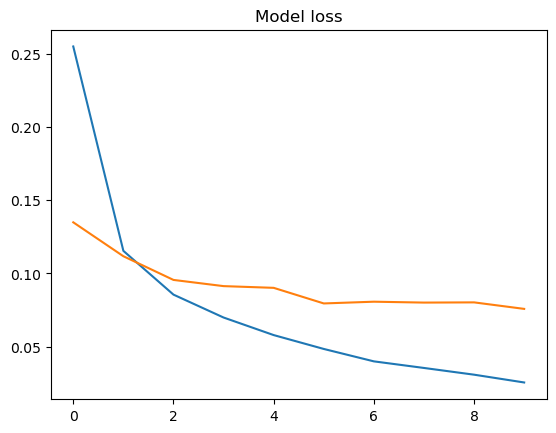

In [22]:
# Plot the training and validation accuracy over the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')

In [23]:
# Get the predicted labels for the test data
y_pred=model.predict(x_test)


187/187 [==============================] - 1s 2ms/step


# Visualizing & Viewing test results

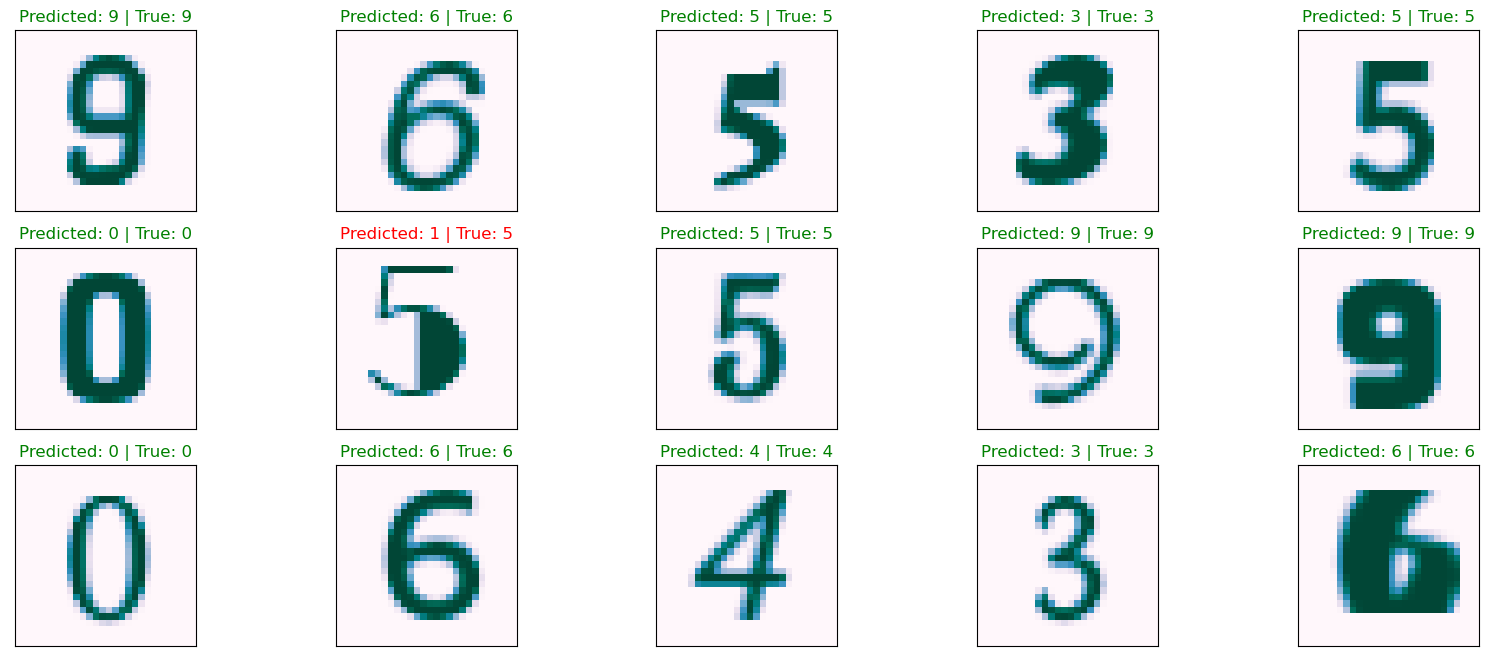

In [26]:
# Plot a random sample of test images with their predicted labels
figure=plt.figure(figsize=(20,8))
for i,index in enumerate(np.random.choice(x_test.shape[0],size=15,replace=False)):
    ax=figure.add_subplot(3,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.reshape(x_test.iloc[index].values, (28, 28)), cmap='PuBuGn')
    pred_label=np.argmax(y_pred[index])
    true_label=y_test.iloc[index]
    ax.set_title("Predicted: {} | True: {}".format(pred_label,true_label),
                color=("green" if pred_label==true_label else "red"))

# Step 8: Understanding the Overall results
   Plotting a confusion matrix to understand which classes are being misclassified and which ones are being classified correctly. Understanding where its inaccurate to see & improve performance

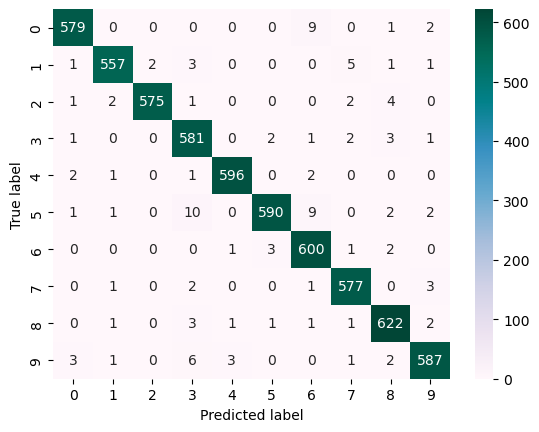

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Convert predicted probabilities to class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to one-hot encoded vectors
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='PuBuGn')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Conclusion

In conclusion, we have successfully created a neural network type classification model for the TMNIST dataset using Python libraries such as pandas, numpy, matplotlib, tensorflow, and keras. We have covered all the necessary steps such as importing libraries, reading in the data, exploring and preparing the data for modeling, building and training a neural network, evaluating its performance, and visualizing the results. Our model achieved an accuracy of 98% which is quite impressive. By following this, you can create your own neural network type classification model for the TMNIST dataset and gain insights into how to evaluate and visualize the model's performance.